# Laboratorio No. 2 - Modelacion y Simulacion

### 2.2 Crecimiento epidemiologico

Manuel Rodas - 21509 / Jose Santisteban - 21153 / Sebastian Solorzano - 21826

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
S0 = 990
I0 = 10
R0 = 0
N = 1000

In [4]:
beta = 0.3
gamma = 0.1
t_final = 50
dt = 0.1

### Arreglos para resultados

In [5]:
t = np.arange(0, t_final + dt, dt)
S = np.zeros(len(t))
I = np.zeros(len(t))
R = np.zeros(len(t))

S[0] = S0
I[0] = I0
R[0] = R0

### Metodo de Euler

In [6]:
for i in range(1, len(t)):
    dSdt = -beta * S[i-1] * I[i-1] / N
    dIdt = beta * S[i-1] * I[i-1] / N - gamma * I[i-1]
    dRdt = gamma * I[i-1]
    
    S[i] = max(S[i-1] + dSdt * dt, 0)
    I[i] = max(I[i-1] + dIdt * dt, 0)
    R[i] = max(R[i-1] + dRdt * dt, 0)
    
    S[i] = max(S[i], 1e-10)
    I[i] = max(I[i], 1e-10)
    R[i] = max(R[i], 1e-10)

### Resultados

In [7]:
print(f"Después de {t_final} días:")
print(f"Susceptibles: {S[-1]:.2f}")
print(f"Infectados: {I[-1]:.2f}")
print(f"Recuperados: {R[-1]:.2f}")

Después de 50 días:
Susceptibles: 81.35
Infectados: 88.44
Recuperados: 830.21


### Grafica

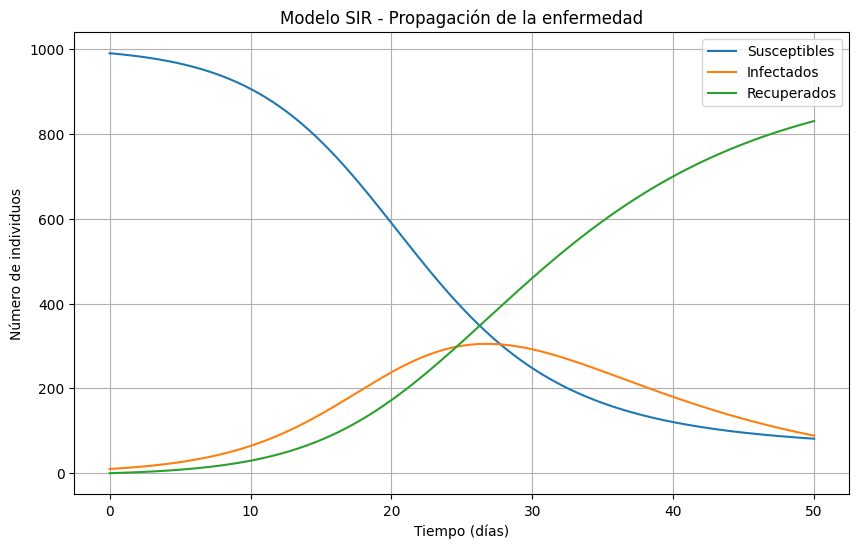

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptibles')
plt.plot(t, I, label='Infectados')
plt.plot(t, R, label='Recuperados')
plt.xlabel('Tiempo (días)')
plt.ylabel('Número de individuos')
plt.title('Modelo SIR - Propagación de la enfermedad')
plt.legend()
plt.grid(True)
plt.show()